In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
try:
    import ai4neb
except:
    !pip install -U git+https://github.com/morisset/AI4neb.git
    import ai4neb
print("ai4neb version:", ai4neb.__version__)

ai4neb version: 0.2.15b1


In [3]:
import tensorflow as tf
from keras import __version__ as keras_version
print("Tensorflow version: ", tf.__version__)
print("Keras version: ", keras_version)

Tensorflow version:  2.15.0
Keras version:  2.15.0


In [4]:
from ai4neb import manage_RM
print(manage_RM().keras_access, manage_RM().keras_version)

keras 2.15.0


In [5]:
def true_fun(x):
    return np.cos(1.5 * np.pi * x)
def true_fun2(x):
    return np.sin(1.5 * np.pi * x)

# A random seed to reproduce the results
np.random.seed(0)

# The number of points used to fit the function
n_samples = 30

# Noise to be added to the points used to fit the function
noise = 0.1

# The training set: n_samples X points, with the noisy correspoing y  
X_train = np.random.rand(n_samples)
y_train = true_fun(X_train) + np.random.randn(n_samples) * noise
y_train2 = true_fun2(X_train) + np.random.randn(n_samples) * noise

# The set of points to verify the fit quality
X_test = np.linspace(0, 1, 100)
y_test = true_fun(X_test)
y_test2 = true_fun2(X_test)


In [6]:
RM = ai4neb.manage_RM(RM_type='SK_ANN', X_train=X_train, y_train=y_train, scaling=True, use_log=False,
                      X_test = X_test, y_test=y_test, verbose=True, random_seed=10)
RM.init_RM(hidden_layer_sizes=(100,100), 
           tol=1e-6, max_iter=100, 
           activation='tanh',
           solver='adam')
RM.train_RM()
RM.predict()

Instantiation. V 0.17
Training set size = 30, Test set size = 100
Train data scaled. 
Test data scaled. 
Training set size = 30, Test set size = 100
Training set size = 30, Test set size = 100
Regression Model SK_ANN
Training 1 inputs for 1 outputs with 30 data
RM trained, with 100 iterations. Score = 0.951
MLPRegressor(activation='tanh', hidden_layer_sizes=(100, 100), max_iter=100,
             random_state=10, tol=1e-06)
Training time 0.0 s.
Predicting from 1 inputs to 1 outputs using 100 data in 0.00 secs.


/Users/christophemorisset/anaconda25/envs/ML_tfk/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


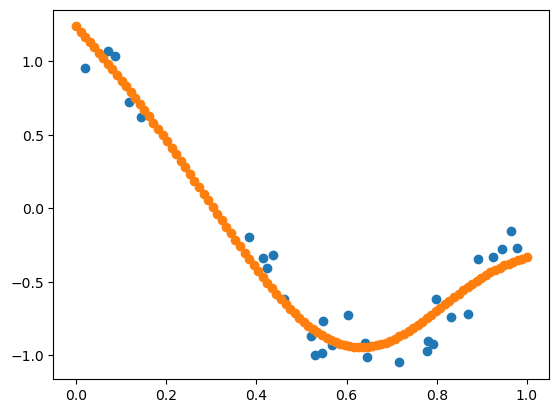

In [7]:
plt.scatter(X_train, y_train)
plt.scatter(RM.X_test_unscaled, RM.pred);

In [8]:
RM.save_RM('RM1', save_train=True, save_test=True)
RM_back = ai4neb.manage_RM(RM_filename='RM1', verbose=True)
"""
print(RM.X_train[0:5]/ RM_back.X_train[0:5])
print(RM.y_train[0:5]/ RM_back.y_train[0:5])
print(RM.X_test[0:5]/ RM_back.X_test[0:5])
print(RM.y_test[0:5]/ RM_back.y_test[0:5])
print(RM.X_train_unscaled[0:5]/ RM_back.X_train_unscaled[0:5])
print(RM.y_train_unscaled[0:5]/ RM_back.y_train_unscaled[0:5])
print(RM.X_test_unscaled[0:5]/ RM_back.X_test_unscaled[0:5])
""";

RM save to RM1.ai4neb_sk
Instantiation. V 0.17
Training set size = 0, Test set size = 0
RM loaded from RM1.ai4neb_sk
Train data scaled. 
Test data scaled. 
Training set size = 30, Test set size = 100
Training set size = 30, Test set size = 100


Predicting from 1 inputs to 1 outputs using 100 data in 0.00 secs.


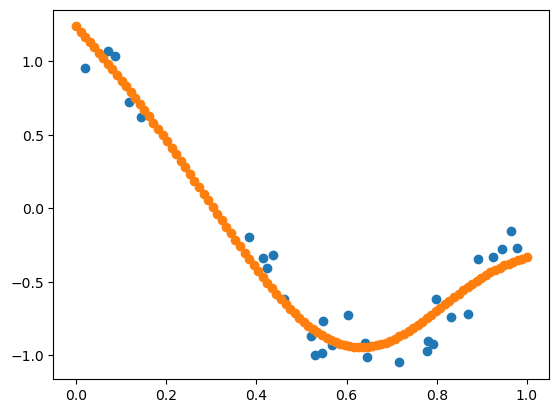

In [9]:
#RM_back.set_test(X_test)
RM_back.predict(scoring=False)
plt.scatter(X_train, y_train)
plt.scatter(RM_back.X_test_unscaled, RM_back.pred);

In [10]:
RM = ai4neb.manage_RM(RM_type='SK_ANN', X_train=X_train, y_train=np.array([y_train, y_train2]).T, scaling=True,
                      X_test = X_test, y_test=np.array([y_test, y_test2]).T, verbose=True, random_seed=10)
RM.init_RM(hidden_layer_sizes=(100,100), 
           tol=1e-6, max_iter=100, 
           activation='tanh',
           solver='adam')
RM.train_RM()
RM.predict(scoring=True)

Instantiation. V 0.17
Training set size = 30, Test set size = 100
Train data scaled. 
Test data scaled. 
Training set size = 30, Test set size = 100
Training set size = 30, Test set size = 100
Regression Model SK_ANN
Training 1 inputs for 2 outputs with 30 data
RM trained, with 100 iterations. Score = 0.943
MLPRegressor(activation='tanh', hidden_layer_sizes=(100, 100), max_iter=100,
             random_state=10, tol=1e-06)
Training time 0.0 s.
Score = nan
Predicting from 1 inputs to 2 outputs using 100 data in 0.00 secs.


/Users/christophemorisset/anaconda25/envs/ML_tfk/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


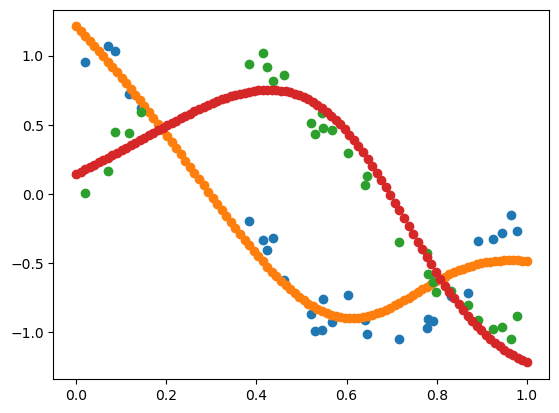

In [11]:
plt.scatter(X_train, y_train)
plt.scatter(RM.X_test_unscaled, RM.pred[:,0])
plt.scatter(X_train, y_train2)
plt.scatter(RM.X_test_unscaled, RM.pred[:,1]);

RM save to RM2.ai4neb_sk


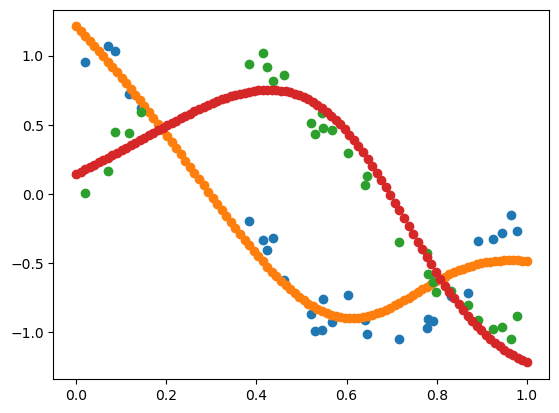

In [12]:
RM.save_RM('RM2')
RM_back2 = ai4neb.manage_RM(RM_filename='RM2')
RM_back2.set_test(X_test)
RM_back2.predict(scoring=False)
plt.scatter(X_train, y_train)
plt.scatter(RM_back2.X_test_unscaled, RM_back2.pred[:,0])
plt.scatter(X_train, y_train2)
plt.scatter(RM_back2.X_test_unscaled, RM_back2.pred[:,1]);

In [13]:
RM = ai4neb.manage_RM(RM_type='K_ANN', X_train=X_train, y_train=y_train, scaling=True,
                      X_test = X_test, y_test=y_test, verbose=True, random_seed=10)
RM.init_RM(hidden_layer_sizes=(100, 100), 
           tol=1e-6, epochs=100, 
           activation='tanh',
           solver='adam')
RM.train_RM()
RM.predict(scoring=False)

Instantiation. V 0.17
Training set size = 30, Test set size = 100
Train data scaled. 
Test data scaled. 
Training set size = 30, Test set size = 100
Training set size = 30, Test set size = 100
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               200       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10401 (40.63 KB)
Trainable params: 10401 (40.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Regression Model K_ANN
Training 1 inputs for 1 outputs with 30 data
1/1 [==================

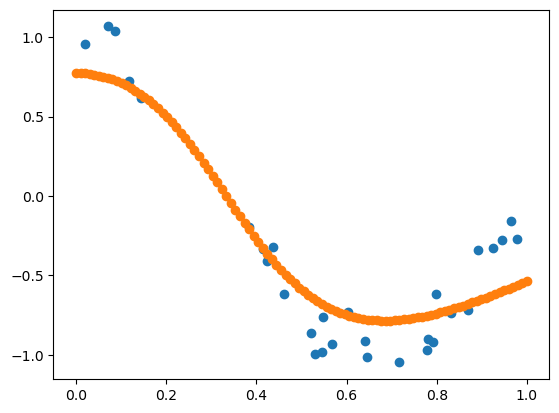

In [14]:
plt.scatter(X_train, y_train)
plt.scatter(RM.X_test_unscaled, RM.pred);

RM save to RM3.ai4neb_k0
INFO:tensorflow:Assets written to: RM3.ai4neb_k1/assets


INFO:tensorflow:Assets written to: RM3.ai4neb_k1/assets


RM save to RM3.ai4neb_k1
Instantiation. V 0.17
Training set size = 0, Test set size = 0
RM loaded from RM3.ai4neb_k0
RM loaded from RM3.ai4neb_k1
Train data scaled. 
Test data scaled. 
Training set size = 30, Test set size = 100
Training set size = 30, Test set size = 100
Test data scaled. 
Training set size = 30, Test set size = 100
4/4 [==============================] - 0s 651us/step
Predicting from 1 inputs to 1 outputs using 100 data in 0.04 secs.


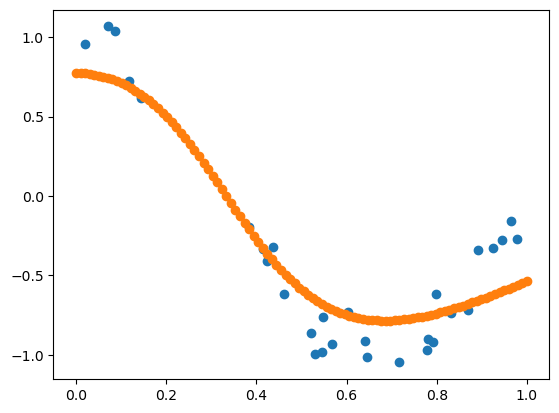

In [15]:
RM.save_RM('RM3')
RM_back3 = ai4neb.manage_RM(RM_filename='RM3', verbose=True)
RM_back3.set_test(X_test)
RM_back3.predict(scoring=False)
plt.scatter(X_train, y_train)
plt.scatter(RM_back3.X_test_unscaled, RM_back3.pred);

In [16]:
RM = ai4neb.manage_RM(RM_type='K_ANN', X_train=X_train, y_train=np.array([y_train, y_train2]).T, scaling=True,
                      X_test = X_test, y_test=np.array([y_test, y_test2]).T, verbose=True, random_seed=10)
RM.init_RM(hidden_layer_sizes=(100,100), 
           tol=1e-6, epochs=100, 
           activation='tanh',
           solver='adam')
RM.train_RM()
RM.predict(scoring=False)

Instantiation. V 0.17
Training set size = 30, Test set size = 100
Train data scaled. 
Test data scaled. 
Training set size = 30, Test set size = 100
Training set size = 30, Test set size = 100
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               200       
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 2)                 202       
                                                                 
Total params: 10502 (41.02 KB)
Trainable params: 10502 (41.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Regression Model K_ANN
Training 1 inputs for 2 outputs with 30 data
1/1 [================

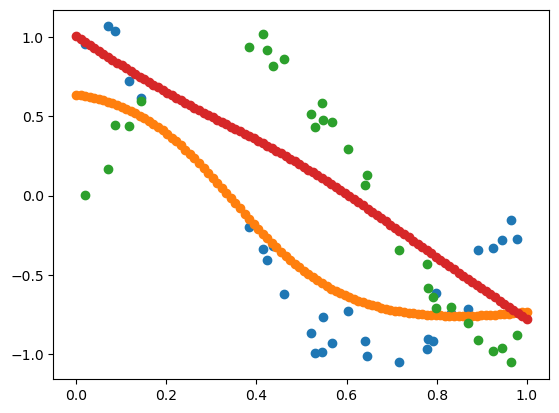

In [17]:
plt.scatter(X_train, y_train)
plt.scatter(RM.X_test_unscaled, RM.pred[:,0])
plt.scatter(X_train, y_train2)
plt.scatter(RM.X_test_unscaled, RM.pred[:,1]);

In [18]:
RM.save_RM('RM4')


RM save to RM4.ai4neb_k0
INFO:tensorflow:Assets written to: RM4.ai4neb_k1/assets


INFO:tensorflow:Assets written to: RM4.ai4neb_k1/assets


RM save to RM4.ai4neb_k1


Instantiation. V 0.17
Training set size = 0, Test set size = 0
RM loaded from RM4.ai4neb_k0
RM loaded from RM4.ai4neb_k1
Train data scaled. 
Test data scaled. 
Training set size = 30, Test set size = 100
Training set size = 30, Test set size = 100
Test data scaled. 
Training set size = 30, Test set size = 100
4/4 [==============================] - 0s 709us/step
Predicting from 1 inputs to 2 outputs using 100 data in 0.04 secs.


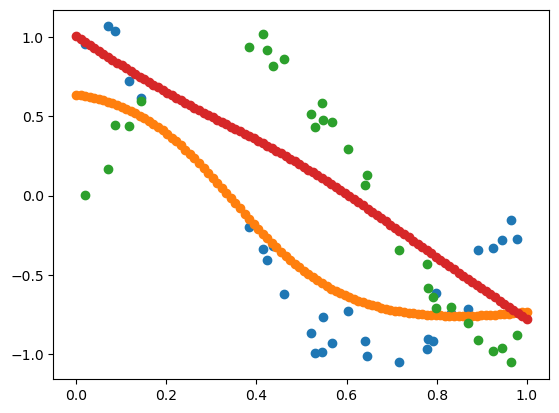

In [19]:
RM_back4 = ai4neb.manage_RM(RM_filename='RM4', verbose=True)
RM_back4.set_test(X_test)
RM_back4.predict(scoring=False)
plt.scatter(X_train, y_train)
plt.scatter(RM_back4.X_test_unscaled, RM_back4.pred[:,0])
plt.scatter(X_train, y_train2)
plt.scatter(RM_back4.X_test_unscaled, RM_back4.pred[:,1]);

In [21]:
!ls -lh RM*

-rw-r--r--  1 christophemorisset  staff   335K May 13 15:01 RM1.ai4neb_sk
-rw-r--r--  1 christophemorisset  staff   336K May 13 14:34 RM2.ai4neb_sk
-rw-r--r--  1 christophemorisset  staff   714B May 13 15:01 RM3.ai4neb_k0
-rw-r--r--  1 christophemorisset  staff   147K May 13 15:01 RM3_1.keras
-rw-r--r--  1 christophemorisset  staff   714B May 13 15:55 RM4.ai4neb_k0
-rw-r--r--  1 christophemorisset  staff   148K May 13 15:55 RM4_1.keras

RM3.ai4neb_k1:
total 240
drwxr-xr-x  2 christophemorisset  staff    64B May 13 14:32 assets
-rw-r--r--  1 christophemorisset  staff    55B May 13 14:32 fingerprint.pb
-rw-r--r--  1 christophemorisset  staff   9.6K May 13 14:32 keras_metadata.pb
-rw-r--r--  1 christophemorisset  staff   101K May 13 14:32 saved_model.pb
drwxr-xr-x  4 christophemorisset  staff   128B May 13 14:32 variables

RM4.ai4neb_k1:
total 240
drwxr-xr-x  2 christophemorisset  staff    64B May 13 14:32 assets
-rw-r--r--  1 christophemorisset  staff    56B May 13 14:32 fingerprint.pb
-